In [3]:
!pip install gurobipy
import gurobipy as g
import matplotlib.pyplot as plt
import random
import itertools
import numpy as np
import math

Defaulting to user installation because normal site-packages is not writeable


In [4]:
def get_division(elements, value):
    perm = list(np.random.permutation(value))[:elements - 1]
    perm.sort()

    result = [perm[0]] + [perm[k+1] - perm[k] for k in range(elements - 2)] + [value - perm[-1]]
    return result

def generate_instance(hubs, customers):
    value = 8 * (hubs + customers)
    hub_supplies = get_division(hubs, value)
    cust_demands = get_division(customers, value)

    assert sum(cust_demands) == sum(hub_supplies)
    hub_data = [(random.random(), random.random(), hub_supply) for hub_supply in hub_supplies]


    cust_data = [(random.random(), random.random(), cust_demand) for cust_demand in cust_demands]

    return hub_data, cust_data

def get_distance(x1, x2):
    return math.sqrt((x1[0] - x2[0]) ** 2 + (x1[1] - x2[1]) ** 2)

def visualize_instance(hub_data, customer_data, links=None):
    max_val = max(max(key[2] for key in hub_data), max(key[2] for key in customer_data))
    hx, hy = [key[0] for key in hub_data], [key[1] for key in hub_data]
    hs = [100 * key[2] / max_val for key in hub_data]
    plt.scatter(hx, hy, s=hs, c="orange")

    cx, cy = [key[0] for key in customer_data], [key[1] for key in customer_data]
    cs = [100 * key[2] / max_val for key in customer_data]
    plt.scatter(cx, cy, s=cs, c="blue")

    if links:
        for h, c, amount in links:
            hub, cust = hub_data[h], customer_data[c]
            plt.plot([hub[0], cust[0]],[hub[1], cust[1]], c="black", linewidth=amount/max_val * 5, zorder=0)

    plt.show()


In [5]:
random.seed(0)
nm_hubs, nm_cust = 8, 20
hubs, customers = generate_instance(nm_hubs, nm_cust)

# Transportation problem
# hubs - sources of the product x_coordinate, y_coordinate, amount_of_product
# customers - sinks of the product x_coordinate, y_coordinate, amount_of_product
# we need to allocate the product from hubs to customers so all the orders are met,
# and the cost of the operation is minimized
# weight of a single connection is defined as euclidean distance
# between the hub and customer, calculated
# using the get_distance(hub, customer) method

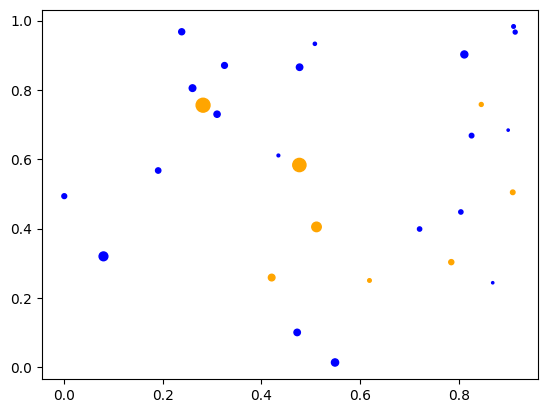

In [6]:
visualize_instance(hubs, customers)

In [ ]:
model = g.Model()

# TODO enter your code
# Hint: use non-negative real variable xs for encoding how much depot i is supplying to customer j

# How to postprocess the links to be visualized
links = []
for i in range(nm_hubs):
    for j in range(nm_cust):
        if xs[i,j].x > 0.00001:
            links.append((i, j, xs[i,j].x))

: 

In [ ]:
visualize_instance(hubs, customers, links)

: 

In [ ]:
visualize_instance(hubs, customers, links)

: 

: 